# The goal is to generate a function `dist_from_centroid`

## The function will accept surface `vertices` and the centroid of a cell `centroid`
### We will then calculate the distnace using spherical coordinates and plot this on the cell surface

In [2]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [19]:
import meshzoo
points, cells = meshzoo.uv_sphere(num_points_per_circle=20, num_circles=10, radius=1.0)
points, tri, quad = meshzoo.geo_sphere(
    num_points_per_circle=20, num_circles=10, radius=1.0
)

centroid = points.mean(axis=0)

In [20]:
"""Calculate distance theta and phi that describes a point from a centroid"""
from numpy import arccos, arctan, split, sqrt, subtract


def spherical_measurement(point, centroid):
    """Calculate distance theta and phi that describes a point from a centroid"""

    # pylint: disable-next=unbalanced-tuple-unpacking
    z_coord, y_coord, x_coord = split(subtract(point, centroid), 3, 1)

    z_squared = z_coord ** 2
    y_squared = y_coord ** 2
    x_squared = x_coord ** 2

    dist = sqrt(z_squared + y_squared + x_squared)
    theta = arccos(z_coord / dist)
    phi = arctan(x_coord / sqrt(y_squared + x_squared))

    return dist, theta, phi


In [21]:
distance,theta,phi = spherical_measurement(points,centroid)
print('Output: r={}, theta={}, phi={}'.format(distance[0][0],theta[0][0],phi[0][0]))

Output: r=1.0, theta=1.5707963267948966, phi=-0.7853981633974483


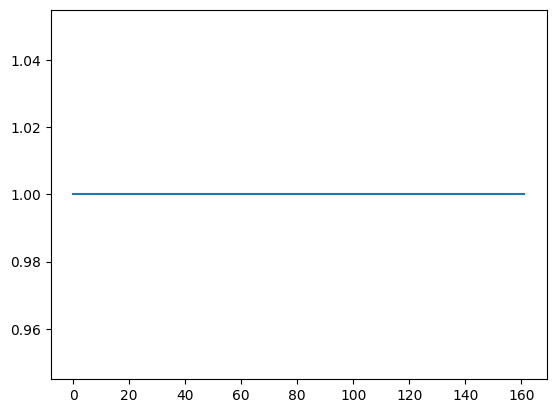

In [22]:
plt.plot(distance)

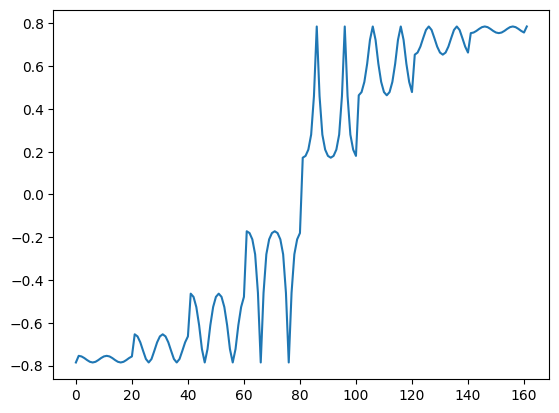

In [23]:
plt.plot(phi)

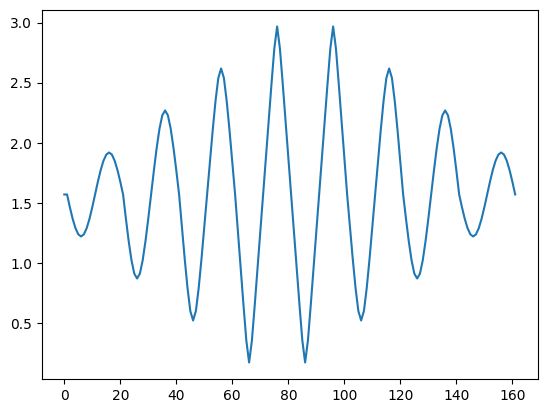

In [24]:
plt.plot(theta)

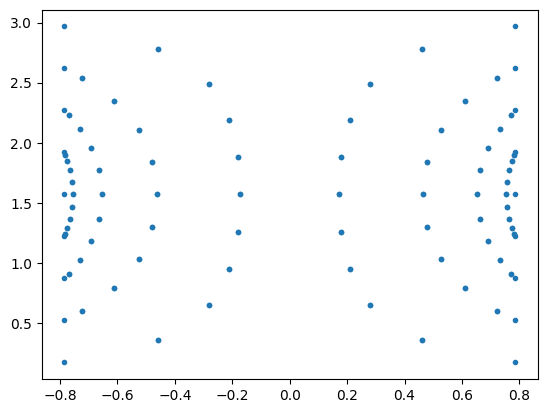

In [29]:
plt.plot(phi,theta,'.')

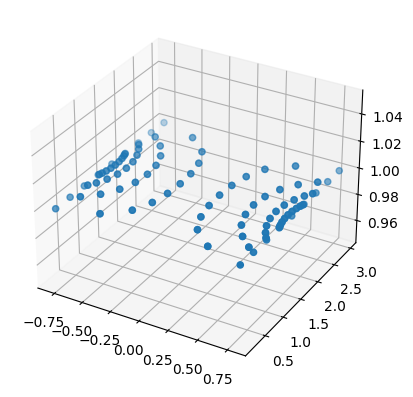

In [35]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(phi, theta, distance)

In [40]:
z = distance*np.cos(theta)
y = distance*np.sin(theta)*np.sin(phi)
x = distance*np.sin(theta)*np.cos(phi)